###### Libs

In [1]:
import pandas as pd

In [2]:
import pandas_profiling

In [3]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [4]:
import warnings
warnings.filterwarnings('ignore')

###### Leitura das bases

In [5]:
df_intencoes=pd.read_csv('./Bases/01_intencoes_final_reduzido.csv')

In [6]:
df_twitter=pd.read_csv('./Bases/02_twitter_final_reduzido_enviar.csv')

In [7]:
df_expectativas=pd.read_csv('./Bases/03_expectativas_final_reduzido_enviar.csv')

In [8]:
df_gabarito=pd.read_csv('./Bases/gabarito_embranco.csv')

In [9]:
df_gabarito.head(15)

,dateref,date,horizonte,diferenca_lula_bolsonaro
0,2021-01-18,2021-01-19,1,NaN
1,2021-01-18,2021-01-20,2,NaN
2,2021-01-18,2021-01-21,3,NaN
3,2021-01-18,2021-01-22,4,NaN
4,2021-01-18,2021-01-23,5,NaN
5,2021-01-18,2021-01-24,6,NaN
6,2021-01-18,2021-01-25,7,NaN
7,2021-01-18,2021-01-26,8,NaN
8,2021-01-18,2021-01-27,9,NaN
9,2021-01-18,2021-01-28,10,NaN


###### Explorando...

df_intencoes é composta apenas por duas colunas: <br> 
- data 
- diferença em pp das inteções de voto em Lula menos as intenções de voto em Bolsonaro

In [10]:
df_intencoes.head(2)

,date,diferenca_lula_bolsonaro
0,2020-01-15,-1.446608
1,2020-01-16,-1.469969


In [11]:
df_intencoes.shape

(853, 2)

df_gabarito é um exemplo de layout do arquivo que deve ser enviado, nele temos: <br> 
- dataref: data de referência de onde os dados devem ser utilizados
- date: data que queremos prever
- horizonte: quantos dias a frente do último dado estamos
- diferenca_lula_bolsonaro: diferença em pp das inteções de voto em Lula menos as intenções de voto em Bolsonaro

In [12]:
df_gabarito.head()

,dateref,date,horizonte,diferenca_lula_bolsonaro
0,2021-01-18,2021-01-19,1,NaN
1,2021-01-18,2021-01-20,2,NaN
2,2021-01-18,2021-01-21,3,NaN
3,2021-01-18,2021-01-22,4,NaN
4,2021-01-18,2021-01-23,5,NaN


In [13]:
df_gabarito.shape

(75, 4)

df_expectativas são expectativas do GPD (Gross Domestic Product = PIB = Produto Interno Bruto) e CPI (Consumer Price Index = Parecido com a Inflação) para daqui a um ano com base na data de ref, nela temos: <br> 
- date: Data de Referência
- BR_gdp_252: Expectativa GDP Brasil um ano a frente
- EU_gdp_252: Expectativa GDP Zona do Euro um ano a frente
- US_gdp_252: Expectativa GDP Estados Unidos um ano a frente
- BR_cpi_252: Expectativa CPI Brasil um ano a frente
- EU_cpi_252: Expectativa CPI Estados Unidos um ano a frente
- US_cpi_252: Expectativa CPI Zona do Euro um ano a frente
- BR_gdp_current: Expectativa GDP Brasil para o ano corrente 
- EU_gdp_current: Expectativa GDP Zona do Euro para o ano corrente 
- US_gdp_current: Expectativa GDP Estados Unidos para o ano corrente 
- BR_cpi_current: Expectativa CPI Brasil para o ano corrente 
- EU_cpi_current: Expectativa CPI Zona do Euro para o ano corrente 
- US_cpi_current: Expectativa CPI Estados Unidos para o ano corrente 

In [14]:
df_expectativas.head(2)

,date,BR_gdp_252,EU_gdp_252,US_gdp_252,BR_cpi_252,EU_cpi_252,US_cpi_252,BR_gdp_current,EU_gdp_current,US_gdp_current,BR_cpi_current,EU_cpi_current,US_cpi_current
0,2018-01-01,-3.5,0.1,-0.45,-10.20,-2.55,1.12,8.5,-4.9,9.55,-6.20,2.45,2.12
1,2018-01-02,2.5,7.1,13.55,-14.15,7.45,0.12,-2.5,9.1,10.55,20.85,8.45,-2.88


In [15]:
df_expectativas.shape

(1597, 13)

In [16]:
# pandas_profiling.ProfileReport(df_expectativas)

df_twitter contém dados sobre posts do twitter dos candidatos Lula e Bolsonaro no ambito geral, ciência-e-tecnologia, saúde, eleições, segurança-e-direitos-humanos, costumes, economia, política-externa, meio-ambiente-e-agricultura, educação, justiça e outros, nela temos: <br> 
- date:	Data
- tweet_count_[x]_Candidato: Volume diário de tweets do Candidato sobre x
- reply_mean_[x]_Candidato: Média diária de replies do Candidato sobre x
- retweet_mean_[x]_Candidato: Média diária de retweets do Candidato sobre x
- favorite_mean_[x]_Candidato: Média diária de curtidas do Candidato sobre x
- nps_mean_[x]_Candidato: Média diária de NPS do Candidato sobre x

In [17]:
df_twitter.head(2)

,date,tweet_count_[geral]_Bolsonaro,reply_mean_[geral]_Bolsonaro,retweet_mean_[geral]_Bolsonaro,favorite_mean_[geral]_Bolsonaro,nps_mean_[geral]_Bolsonaro,tweet_count_[ciência-e-tecnologia]_Bolsonaro,reply_mean_[ciência-e-tecnologia]_Bolsonaro,retweet_mean_[ciência-e-tecnologia]_Bolsonaro,favorite_mean_[ciência-e-tecnologia]_Bolsonaro,...,tweet_count_[outros]_Lula,reply_mean_[outros]_Lula,retweet_mean_[outros]_Lula,favorite_mean_[outros]_Lula,nps_mean_[outros]_Lula,tweet_count_[justiça]_Lula,reply_mean_[justiça]_Lula,retweet_mean_[justiça]_Lula,favorite_mean_[justiça]_Lula,nps_mean_[justiça]_Lula
0,2018-01-01,9.0,1885.5,3832.00,29013.00,59.72,9.0,4.0,3.0,5.0,...,4.0,4.0,5.0,3.0,2.0,5.0,0.0,0.0,2.0,7.0
1,2018-01-02,17.0,1243.0,3602.75,20439.75,61.05,4.0,93.0,557.0,2351.0,...,4.0,8.0,2.0,6.0,0.0,6.0,0.0,9.0,2.0,0.0


In [18]:
df_twitter.shape

(1597, 121)

###### avaliando se a série é estacionária

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

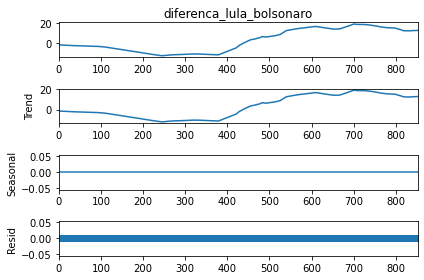

In [20]:
decompose = seasonal_decompose(df_intencoes['diferenca_lula_bolsonaro'], period=1)
decompose.plot();

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
resultados = adfuller(df_intencoes['diferenca_lula_bolsonaro'])

In [23]:
output = pd.Series(resultados[0:4], index=['Estatística do teste', 'p-value', 'Critério da informação maximizado', 'Número de observações usadas'])

In [24]:
def ehEstacionaria(timeseries):
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste', 'p-value', 'Critério da informação maximizado', 'Número de observações usadas'])
    
    for key, value in dftest[4].items():
        
        dfoutput['Valor Crítico (%s)'%key]=value
        
    if (dfoutput['Estatística do teste'] < dfoutput['Valor Crítico (5%)'] and dfoutput['p-value']<0.05):
        print('É estacionária')
    else:
        print('Não é estacionária')

In [25]:
ehEstacionaria(df_intencoes['diferenca_lula_bolsonaro'])

Não é estacionária


##### Tornando a série estacionária

In [26]:
dfdiff = df_intencoes.diferenca_lula_bolsonaro.diff()

In [27]:
dfdiff = dfdiff.dropna()

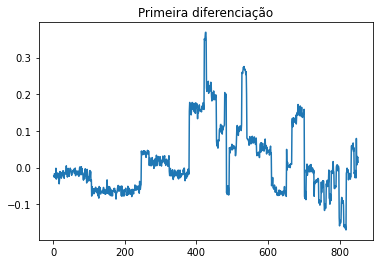

In [28]:
pyplot.title('Primeira diferenciação')
dfdiff.plot()
pyplot.show()

In [29]:
ehEstacionaria(dfdiff)

Não é estacionária


In [30]:
dfdiff = dfdiff.diff().dropna()

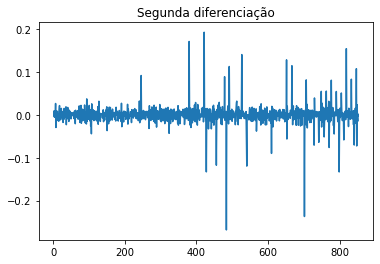

In [31]:
pyplot.title('Segunda diferenciação')
dfdiff.plot()
pyplot.show()

In [32]:
ehEstacionaria(dfdiff)

É estacionária


###### Montando primeiro modelo - Verificando quantidade de lags ideal 

In [33]:
from datetime import datetime

In [34]:
df_intencoes_filtrada = df_intencoes.copy()

In [35]:
df_intencoes_filtrada.reset_index(inplace=True)

In [36]:
df_intencoes_filtrada['date']=pd.to_datetime(df_intencoes_filtrada['date'])

In [37]:
df_intencoes_filtrada = df_intencoes_filtrada[(df_intencoes_filtrada['date']>datetime(2022,5,1))]

In [38]:
df_intencoes_filtrada = df_intencoes_filtrada.set_index('date')

In [40]:
df_intencoes_filtrada.shape[0]

15

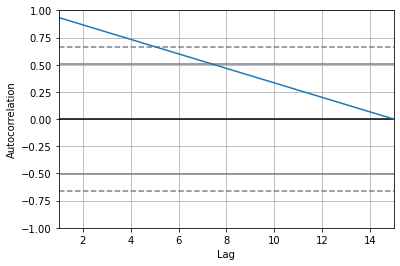

In [41]:
autocorrelation_plot(df_intencoes_filtrada)
pyplot.show()

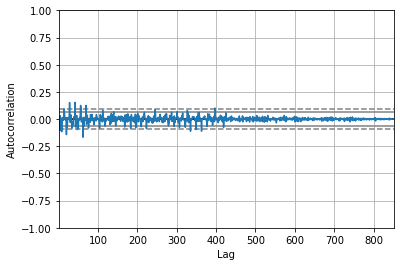

In [42]:
autocorrelation_plot(dfdiff)
pyplot.show()

In [43]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [48]:
df_intencoes_filtrada.drop(['index'], axis=1, inplace=True)

In [49]:
ehEstacionaria(df_intencoes_filtrada.diff().dropna())

É estacionária


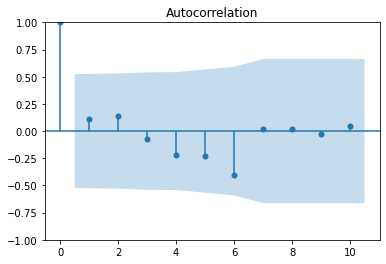

In [50]:
plot_acf(df_intencoes_filtrada.diff().dropna(), lags=10)
pyplot.show()

In [51]:
dfdiff.shape

(851,)

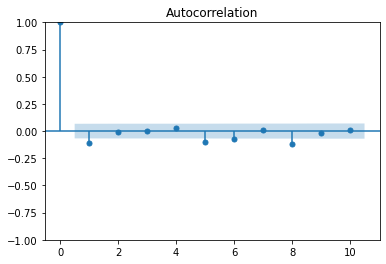

In [52]:
plot_acf(dfdiff, lags=10)
pyplot.show()

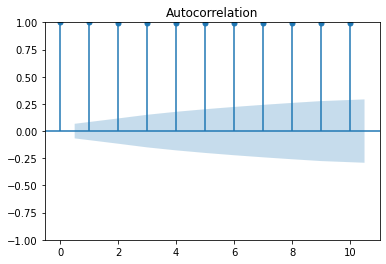

In [55]:
plot_acf(df_intencoes.set_index(['date']), lags=10)
pyplot.show()

- Deve diferenciar a série em 2 vezes, caso use o período completo

###### Juntando informações

In [56]:
df_features=pd.merge(df_expectativas, df_twitter, how='left', on='date')

In [57]:
df_all=pd.merge(df_intencoes, df_features, how='left', on='date')

# GERANDO MODELO

###### Montando primeiro modelo - Definindo treino, teste

Definando datas manualmente

In [60]:
datas_treino=list(df_intencoes[df_intencoes['date']<'2021-01-19']['date'])[:-15]

In [61]:
datas_teste=list(df_features[df_features['date']<'2021-01-19']['date'])[-15:]

###### Montando primeiro modelo - Separando bases

In [62]:
df_features.set_index('date', inplace=True)

In [63]:
features=['nps_mean_[geral]_Bolsonaro', 'nps_mean_[geral]_Lula']

In [65]:
X_treino=df_features.loc[datas_treino, features].values

In [66]:
X_teste=df_features.loc[datas_teste, features].values

In [74]:
df_intencoes = df_intencoes.set_index(['date'])

In [75]:
y_treino=df_intencoes.loc[datas_treino, 'diferenca_lula_bolsonaro'].values

In [76]:
y_teste=df_intencoes.loc[datas_teste, 'diferenca_lula_bolsonaro'].values

###### Montando primeiro modelo - Fitando

In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [78]:
# ARIMA (p, d, q) onde p=lags, d=diferenciação e q=nivel de média movel
model=ARIMA(endog=y_treino, order=(6, 1, 1), exog=X_treino)

In [79]:
model_fit=model.fit()

C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
pred = list()
for i in range(0,len(X_teste)):
    pred.append(model_fit.forecast(exog=X_teste[i])[0])

###### Montando primeiro modelo - Verificando residuos

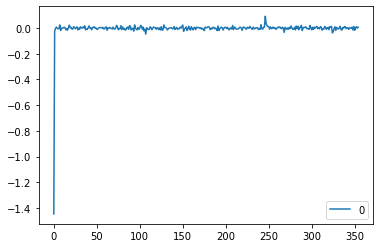

In [82]:
pd.DataFrame(model_fit.resid).plot()
pyplot.show()

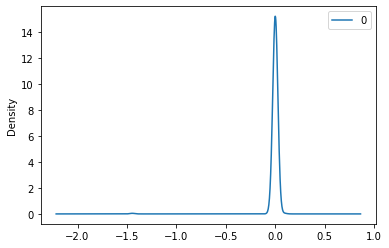

In [83]:
pd.DataFrame(model_fit.resid).plot(kind='kde')
pyplot.show()

In [87]:
df_intencoes_filtrada['diferenca_lula_bolsonaro'] = df_intencoes_filtrada['diferenca_lula_bolsonaro'].astype(int)

In [88]:
print(pd.DataFrame(model_fit.resid).describe())

                0
count  355.000000
mean    -0.004639
std      0.077617
min     -1.446488
25%     -0.008157
50%     -0.000142
75%      0.006070
max      0.091840


In [89]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  355
Model:                 ARIMA(6, 1, 1)   Log Likelihood                1074.749
Date:                Tue, 19 Jul 2022   AIC                          -2129.498
Time:                        23:33:16   BIC                          -2090.805
Sample:                             0   HQIC                         -2114.103
                                - 355                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.816e-06   1.24e-05     -0.147      0.883   -2.61e-05    2.25e-05
x2         -8.357e-07   2.78e-05     -0.030      0.976   -5.52e-05    5.36e-05
ar.L1          0.3840      5.414      0.071      0.9

In [91]:
# from numpy import sqrt
from sklearn.metrics import mean_absolute_error
rmse = mean_absolute_error(y_teste, pred)
print('Test MAE: %.3f' % rmse)

Test MAE: 0.136


###### Montando segundo modelo - Usando o Walking Foward para testar

In [140]:
historico=[x for x in y_treino]

In [141]:
X_treino=df_features.loc[datas_treino, features].values

In [142]:
X_teste=df_features.loc[datas_teste, features].values

In [143]:
preds=list()

In [144]:
def diferencia(dataset, intervalo=1):
    '''Função para criar a diferenciação'''
    diff=list()
    for i in range(intervalo, len(dataset)):
        valor=dataset[i]-dataset[i-intervalo]
        diff.append(valor)
    return diff

In [145]:
def desdiferencia(historico, previsao, intervalo=1):
    '''Função para reverter o valor diferenciado para o original'''
    return previsao + historico[-intervalo]

In [146]:
import numpy as np

In [147]:
ehEstacionaria(pd.DataFrame(y_treino).diff().dropna().diff().dropna())

É estacionária


- Necessário realizar 2 diferenciacoes

In [148]:
for teste in range(len(y_teste)):
    #diferenciação
#     diff=diferencia(historico, 1)
    # modelo ARIMA
    model=ARIMA(endog=historico, order=(15,2,1), exog=X_treino)
    #fit
    model_fit=model.fit()
    #pred
    valor_predito=model_fit.forecast(exog=X_teste[teste])[0]
    #append
    preds.append(valor_predito)
    #valor real
    valor_real=y_teste[teste]
    #hist
    historico.append(valor_predito)
    
    X_treino = list(X_treino)
    X_treino.append(X_teste[teste])
    X_treino = np.array(X_treino)
    

C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\mathe\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

In [149]:
# from numpy import sqrt
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste, preds)
print('Test MAE: %.3f' % mae)

Test MAE: 0.052


###### Montando segundo modelo - olhando residuos

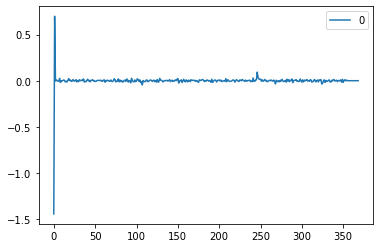

In [150]:
pd.DataFrame(model_fit.resid).plot()
pyplot.show()

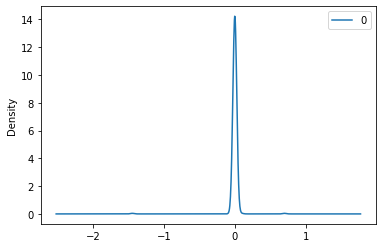

In [151]:
pd.DataFrame(model_fit.resid).plot(kind='kde')
pyplot.show()

In [152]:
print(pd.DataFrame(model_fit.resid).describe())

                0
count  369.000000
mean    -0.001960
std      0.084484
min     -1.446130
25%     -0.006825
50%      0.000084
75%      0.006393
max      0.699686


###### Montando segundo modelo - olhando resultado

In [153]:
resultado=pd.DataFrame({'date': datas_teste, 'real':y_teste, 'predito':preds})

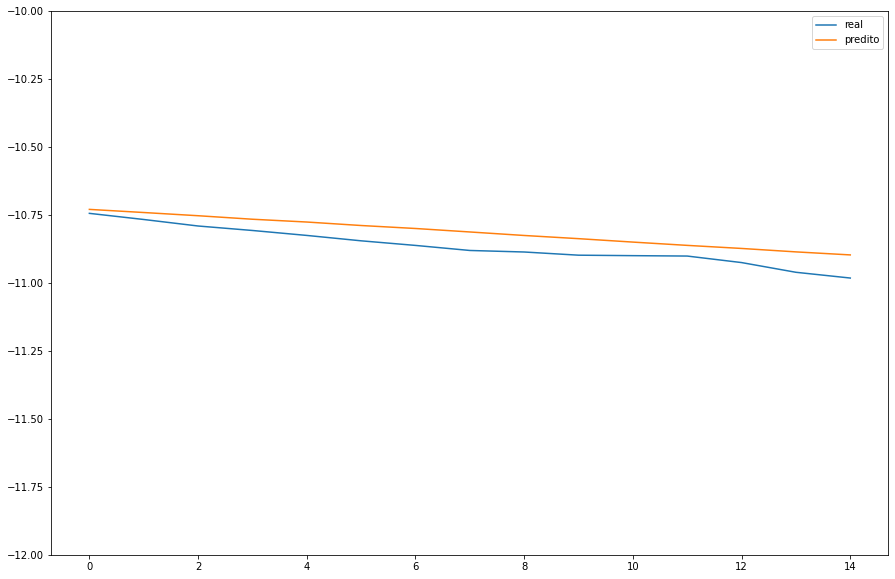

In [155]:
pyplot.figure(figsize=(15,10))
pyplot.plot(resultado['real'], label = "real")
pyplot.plot(resultado['predito'], label = "predito")
pyplot.ylim(-12, -10)
pyplot.legend()
pyplot.show()